# Imports

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

import os

In [122]:
display_analysis = False

In [123]:
original_features_df = pd.read_csv("../data/tables/italian_original_features.csv")
features_df = original_features_df

In [124]:
features_df.head()

,Duration,meanF0,stdevF0,hnr,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,...,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,PD
0,17.312500,129.307948,2.064876,23.959287,0.004173,0.000032,0.002187,0.002334,0.006560,0.024436,...,-55.282018,38.665621,28.515129,39.150729,-40.358730,50.186485,-24.270815,10.154970,-34.798571,1.0
1,11.570000,122.038081,5.155957,27.957755,0.004510,0.000037,0.002313,0.002498,0.006938,0.014446,...,18.800874,24.925375,-99.857594,-37.270614,14.163572,18.289177,-10.002558,-12.910693,10.102795,1.0
2,19.300726,138.828247,2.136906,34.117302,0.002323,0.000017,0.001113,0.001179,0.003339,0.007289,...,118.761195,146.602563,-32.548469,-65.738446,-77.103148,7.728334,-9.946325,-15.429777,-5.522128,1.0
3,15.880000,216.852599,3.371491,26.434427,0.003564,0.000016,0.002018,0.001938,0.006054,0.012845,...,45.681018,-30.248495,-93.353060,-39.482232,-17.346727,-28.619096,-32.626611,-26.639631,-31.803623,1.0
4,6.480000,146.076736,16.504125,30.583621,0.003027,0.000021,0.001518,0.001504,0.004555,0.011083,...,-0.390715,50.701632,-27.637685,-18.008237,-75.936431,-7.159779,25.537555,16.472681,6.557673,1.0


# Data Exploration

In [125]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Duration             493 non-null    float64
 1   meanF0               493 non-null    float64
 2   stdevF0              493 non-null    float64
 3   hnr                  493 non-null    float64
 4   localJitter          493 non-null    float64
 5   localabsoluteJitter  493 non-null    float64
 6   rapJitter            493 non-null    float64
 7   ppq5Jitter           493 non-null    float64
 8   ddpJitter            493 non-null    float64
 9   localShimmer         493 non-null    float64
 10  localdbShimmer       493 non-null    float64
 11  apq3Shimmer          493 non-null    float64
 12  aqpq5Shimmer         493 non-null    float64
 13  apq11Shimmer         493 non-null    float64
 14  ddaShimmer           493 non-null    float64
 15  mfcc0                493 non-null    flo

In [126]:
features_df.dropna(subset=['meanF0'], inplace=True)
features_df.dropna(subset=['stdevF0'], inplace=True)
features_df.dropna(subset=['hnr'], inplace=True)
features_df.dropna(subset=['localJitter'], inplace=True)
features_df.dropna(subset=['localabsoluteJitter'], inplace=True)
features_df.dropna(subset=['rapJitter'], inplace=True)
features_df.dropna(subset=['ppq5Jitter'], inplace=True)
features_df.dropna(subset=['ddpJitter'], inplace=True)
features_df.dropna(subset=['localShimmer'], inplace=True)
features_df.dropna(subset=['localdbShimmer'], inplace=True)
features_df.dropna(subset=['apq3Shimmer'], inplace=True)
features_df.dropna(subset=['aqpq5Shimmer'], inplace=True)
features_df.dropna(subset=['apq11Shimmer'], inplace=True)
features_df.dropna(subset=['ddaShimmer'], inplace=True)
features_df.dropna(subset=['mfcc0'], inplace=True)
features_df.dropna(subset=['mfcc1'], inplace=True)
features_df.dropna(subset=['mfcc2'], inplace=True)
features_df.dropna(subset=['mfcc3'], inplace=True)
features_df.dropna(subset=['mfcc4'], inplace=True)
features_df.dropna(subset=['mfcc5'], inplace=True)
features_df.dropna(subset=['mfcc6'], inplace=True)
features_df.dropna(subset=['mfcc7'], inplace=True)
features_df.dropna(subset=['mfcc8'], inplace=True)
features_df.dropna(subset=['mfcc9'], inplace=True)
features_df.dropna(subset=['mfcc10'], inplace=True)
features_df.dropna(subset=['mfcc11'], inplace=True)
features_df.dropna(subset=['mfcc12'], inplace=True)
features_df.dropna(subset=['PD'], inplace=True)
features_df.dropna(subset=['PD'], inplace=True)

features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Duration             493 non-null    float64
 1   meanF0               493 non-null    float64
 2   stdevF0              493 non-null    float64
 3   hnr                  493 non-null    float64
 4   localJitter          493 non-null    float64
 5   localabsoluteJitter  493 non-null    float64
 6   rapJitter            493 non-null    float64
 7   ppq5Jitter           493 non-null    float64
 8   ddpJitter            493 non-null    float64
 9   localShimmer         493 non-null    float64
 10  localdbShimmer       493 non-null    float64
 11  apq3Shimmer          493 non-null    float64
 12  aqpq5Shimmer         493 non-null    float64
 13  apq11Shimmer         493 non-null    float64
 14  ddaShimmer           493 non-null    float64
 15  mfcc0                493 non-null    flo

All types are consistent and no null values

### verifying duplicates

In [127]:
features_df[features_df.duplicated()]

,Duration,meanF0,stdevF0,hnr,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,...,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,PD


no duplicates

In [128]:
def displayBoxplots():
    plt.figure(figsize= (20,15))
    plt.subplot(5,5,1)
    sns.boxplot(features_df["meanF0"],orient="v", color='lightblue')
    plt.xlabel('meanF0')

    plt.subplot(5,5,2)
    sns.boxplot(features_df["stdevF0"],orient="v", color='lightblue')
    plt.xlabel('stdevF0')

    plt.subplot(5,5,3)
    sns.boxplot(features_df["hnr"],orient="v", color='lightblue')
    plt.xlabel('hnr')

    plt.subplot(5,5,4)
    sns.boxplot(features_df["localJitter"],orient="v", color='lightblue')
    plt.xlabel('localJitter')

    plt.subplot(5,5,5)
    sns.boxplot(features_df["localabsoluteJitter"],orient="v", color='lightblue')
    plt.xlabel('localabsoluteJitter')

    plt.subplot(5,5,6)
    sns.boxplot(features_df["rapJitter"],orient="v", color='lightblue')
    plt.xlabel('rapJitter')

    plt.subplot(5,5,7)
    sns.boxplot(features_df["ppq5Jitter"],orient="v", color='lightblue')
    plt.xlabel('ppq5Jitter')

    plt.subplot(5,5,8)
    sns.boxplot(features_df["ddpJitter"],orient="v", color='lightblue')
    plt.xlabel('ddpJitter')

    plt.subplot(5,5,9)
    sns.boxplot(features_df["localShimmer"],orient="v", color='lightblue')
    plt.xlabel('localShimmer')

    plt.subplot(5,5,10)
    sns.boxplot(features_df["localdbShimmer"],orient="v", color='lightblue')
    plt.xlabel('localdbShimmer')

    plt.subplot(5,5,11)
    sns.boxplot(features_df["apq3Shimmer"],orient="v", color='lightblue')
    plt.xlabel('apq3Shimmer')

    plt.subplot(5,5,12)
    sns.boxplot(features_df["aqpq5Shimmer"],orient="v", color='lightblue')
    plt.xlabel('aqpq5Shimmer')

    plt.subplot(5,5,13)
    sns.boxplot(features_df["apq11Shimmer"],orient="v", color='lightblue')
    plt.xlabel('apq11Shimmer')

    plt.subplot(5,5,14)
    sns.boxplot(features_df["ddaShimmer"],orient="v", color='lightblue')
    plt.xlabel('ddaShimmer')


if display_analysis:
    displayBoxplots()


Some outliers, mostly above the plots

In [129]:
def getKdeplots():
    plt.figure(figsize=(20, 15))
    plt.subplot(5,5,1)
    sns.kdeplot(features_df["meanF0"], color='lightblue')
    plt.xlabel('meanF0')

    plt.subplot(5,5,2)
    sns.kdeplot(features_df["stdevF0"], color='lightblue')
    plt.xlabel('stdevF0')

    plt.subplot(5,5,3)
    sns.kdeplot(features_df["hnr"],color='lightblue')
    plt.xlabel('hnr')

    plt.subplot(5,5,4)
    sns.kdeplot(features_df["localJitter"],color='lightblue')
    plt.xlabel('localJitter')

    plt.subplot(5,5,5)
    sns.kdeplot(features_df["localabsoluteJitter"],color='lightblue')
    plt.xlabel('localabsoluteJitter')

    plt.subplot(5,5,6)
    sns.kdeplot(features_df["rapJitter"],color='lightblue')
    plt.xlabel('rapJitter')

    plt.subplot(5,5,7)
    sns.kdeplot(features_df["ppq5Jitter"],color='lightblue')
    plt.xlabel('ppq5Jitter')

    plt.subplot(5,5,8)
    sns.kdeplot(features_df["ddpJitter"],color='lightblue')
    plt.xlabel('ddpJitter')

    plt.subplot(5,5,9)
    sns.kdeplot(features_df["localShimmer"],color='lightblue')
    plt.xlabel('localShimmer')

    plt.subplot(5,5,10)
    sns.kdeplot(features_df["localdbShimmer"],color='lightblue')
    plt.xlabel('localdbShimmer')

    plt.subplot(5,5,11)
    sns.kdeplot(features_df["apq3Shimmer"],color='lightblue')
    plt.xlabel('apq3Shimmer')

    plt.subplot(5,5,12)
    sns.kdeplot(features_df["aqpq5Shimmer"],color='lightblue')
    plt.xlabel('aqpq5Shimmer')

    plt.subplot(5,5,13)
    sns.kdeplot(features_df["apq11Shimmer"],color='lightblue')
    plt.xlabel('apq11Shimmer')

    plt.subplot(5,5,14)
    sns.kdeplot(features_df["ddaShimmer"],color='lightblue')
    plt.xlabel('ddaShimmer')

if display_analysis:
    getKdeplots()


# Bivariate analysis

In [130]:
if display_analysis:
    sns.pairplot(features_df)  #pairplot
    plt.show()

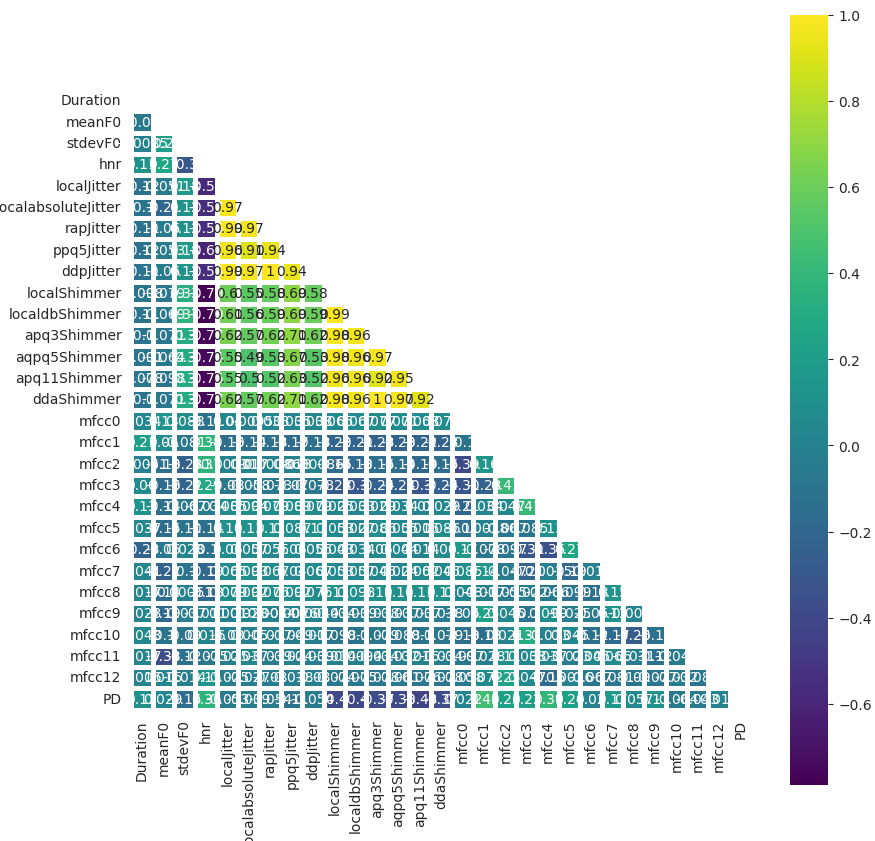

In [131]:
correlation = original_features_df.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(correlation,mask=mask,square=True,linewidths=2.5,cmap="viridis",annot=True)

(29.5, -0.5)

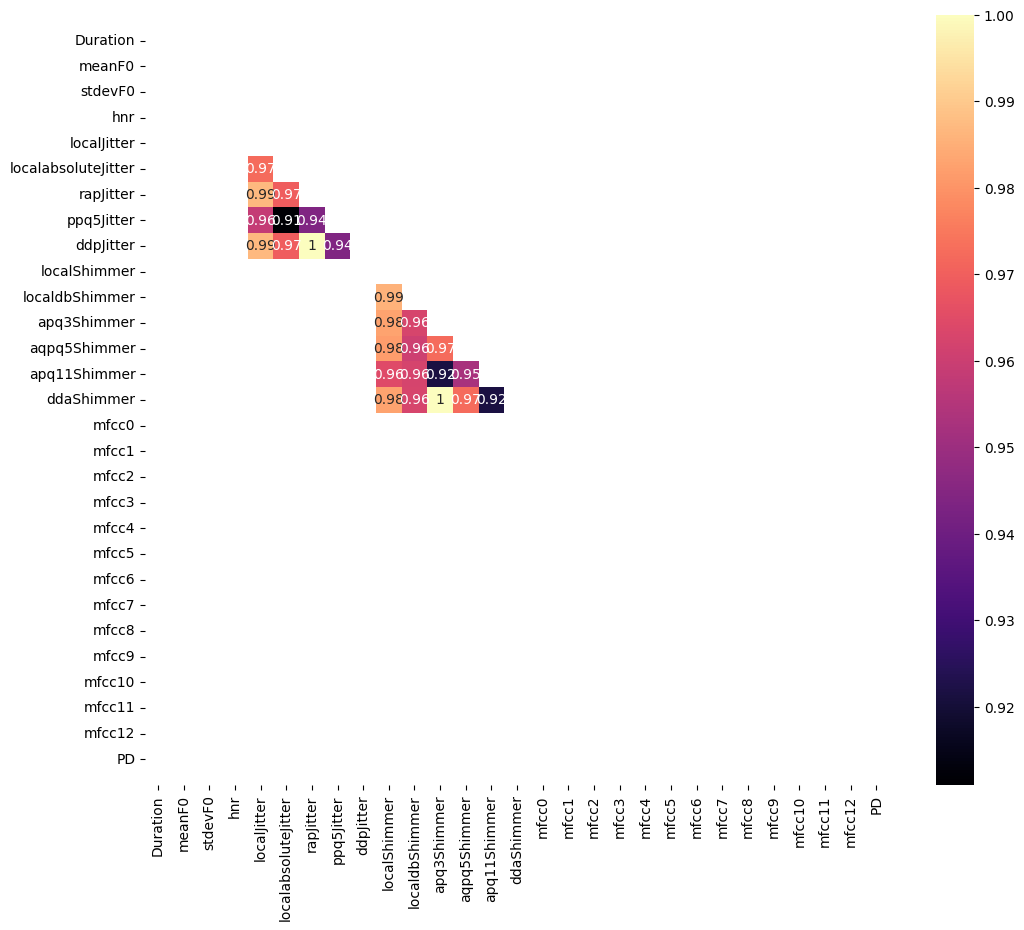

In [132]:
plt.figure(figsize=(12, 10))
df_corr = original_features_df.corr(method='pearson')
matrix = np.triu(df_corr)
ax = sns.heatmap(df_corr[(df_corr >= 0.80) | (df_corr <= -0.80)], annot=True, cmap='magma', mask=matrix)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [133]:
print("number of parkinson people in the dataset ",len(features_df.loc[features_df["PD"]==1]))
print("number of Healthy people in the dataset ",len(features_df.loc[features_df["PD"]==0]))

number of parkinson people in the dataset  274
number of Healthy people in the dataset  219


# Pre-processing

In [134]:
features_df

,Duration,meanF0,stdevF0,hnr,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,...,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,PD
0,17.312500,129.307948,2.064876,23.959287,0.004173,0.000032,0.002187,0.002334,0.006560,0.024436,...,-55.282018,38.665621,28.515129,39.150729,-40.358730,50.186485,-24.270815,10.154970,-34.798571,1.0
1,11.570000,122.038081,5.155957,27.957755,0.004510,0.000037,0.002313,0.002498,0.006938,0.014446,...,18.800874,24.925375,-99.857594,-37.270614,14.163572,18.289177,-10.002558,-12.910693,10.102795,1.0
2,19.300726,138.828247,2.136906,34.117302,0.002323,0.000017,0.001113,0.001179,0.003339,0.007289,...,118.761195,146.602563,-32.548469,-65.738446,-77.103148,7.728334,-9.946325,-15.429777,-5.522128,1.0
3,15.880000,216.852599,3.371491,26.434427,0.003564,0.000016,0.002018,0.001938,0.006054,0.012845,...,45.681018,-30.248495,-93.353060,-39.482232,-17.346727,-28.619096,-32.626611,-26.639631,-31.803623,1.0
4,6.480000,146.076736,16.504125,30.583621,0.003027,0.000021,0.001518,0.001504,0.004555,0.011083,...,-0.390715,50.701632,-27.637685,-18.008237,-75.936431,-7.159779,25.537555,16.472681,6.557673,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,17.995062,120.238273,15.841945,31.049953,0.002637,0.000022,0.001333,0.001443,0.004000,0.016649,...,-82.443054,-80.722589,-47.682495,-24.159954,-28.355728,8.521285,1.230935,12.537409,-2.654274,0.0
489,7.296000,125.702970,3.419908,14.176360,0.006556,0.000052,0.003642,0.003866,0.010925,0.084865,...,-78.149194,30.988700,24.493318,-20.969052,-23.542736,-1.080957,-16.940854,-6.063577,3.062718,0.0
490,6.656000,132.869272,28.935070,12.890455,0.007594,0.000057,0.004119,0.004149,0.012357,0.077653,...,-92.426071,-16.278222,24.494387,-1.847811,-56.114239,33.287081,-18.890684,-7.737241,-17.210579,0.0
491,7.000000,220.372089,5.931401,14.642913,0.023239,0.000105,0.013427,0.016328,0.040282,0.150485,...,-17.330426,-34.816876,-25.159511,-11.765553,10.364775,-18.593119,-27.932900,-38.736094,-18.634262,0.0


In [135]:
features_df.drop('Duration', axis=1, inplace=True)

Drop the "Duration" column.

### Outlier treatment

In [136]:
def outliearTreatment(df):
    '''
    Any values greater than the whisker (3IQ) are set to the whisker value, 
    and any values lower than the LowerBound (1IQ) are set to the LowerBound.
    '''
    cols = list(df.columns)
    cols.remove('PD')
    for columnName in cols:
        Q1 = df[columnName].quantile(0.25)
        Q3 = df[columnName].quantile(0.75)
        IQR = Q3 - Q1
        whisker = Q1 + 1.5 * IQR
        LowerBound = Q1- 1.5 * IQR
        df[columnName] = df[columnName].apply(lambda x : whisker if x>whisker else x)
        df[columnName] = df[columnName].apply(lambda x : LowerBound if x<LowerBound else x)
    return df

In [137]:
removed_outliers = outliearTreatment(features_df)


In [138]:
def showBoxPlots():
    plt.figure(figsize= (20,15))
    plt.subplot(5,5,1)
    sns.boxplot(removed_outliers["meanF0"],orient="v", color='lightblue')
    plt.xlabel('meanF0')

    plt.subplot(5,5,2)
    sns.boxplot(removed_outliers["stdevF0"],orient="v", color='lightblue')
    plt.xlabel('stdevF0')

    plt.subplot(5,5,3)
    sns.boxplot(removed_outliers["hnr"],orient="v", color='lightblue')
    plt.xlabel('hnr')

    plt.subplot(5,5,4)
    sns.boxplot(removed_outliers["localJitter"],orient="v", color='lightblue')
    plt.xlabel('localJitter')

    plt.subplot(5,5,5)
    sns.boxplot(removed_outliers["localabsoluteJitter"],orient="v", color='lightblue')
    plt.xlabel('localabsoluteJitter')

    plt.subplot(5,5,6)
    sns.boxplot(removed_outliers["rapJitter"],orient="v", color='lightblue')
    plt.xlabel('rapJitter')

    plt.subplot(5,5,7)
    sns.boxplot(removed_outliers["ppq5Jitter"],orient="v", color='lightblue')
    plt.xlabel('ppq5Jitter')

    plt.subplot(5,5,8)
    sns.boxplot(removed_outliers["ddpJitter"],orient="v", color='lightblue')
    plt.xlabel('ddpJitter')

    plt.subplot(5,5,9)
    sns.boxplot(removed_outliers["localShimmer"],orient="v", color='lightblue')
    plt.xlabel('localShimmer')

    plt.subplot(5,5,10)
    sns.boxplot(removed_outliers["localdbShimmer"],orient="v", color='lightblue')
    plt.xlabel('localdbShimmer')

    plt.subplot(5,5,11)
    sns.boxplot(removed_outliers["apq3Shimmer"],orient="v", color='lightblue')
    plt.xlabel('apq3Shimmer')

    plt.subplot(5,5,12)
    sns.boxplot(removed_outliers["aqpq5Shimmer"],orient="v", color='lightblue')
    plt.xlabel('aqpq5Shimmer')

    plt.subplot(5,5,13)
    sns.boxplot(removed_outliers["apq11Shimmer"],orient="v", color='lightblue')
    plt.xlabel('apq11Shimmer')

    plt.subplot(5,5,14)
    sns.boxplot(removed_outliers["ddaShimmer"],orient="v", color='lightblue')
    plt.xlabel('ddaShimmer')

if display_analysis:
    showBoxPlots()


In [139]:
if display_analysis:
    getKdeplots()

### checking and removing multi-colinearity

As displayed in the heatmap before, certain independent attributes have high correlations. Multicollinearity can be a problem for us, because we could not be able to determine the effects of each independent variables on the dependent variable.

We can compute the Variable Inflation Factors (VIF) score for each independent variable. It represents how well the variable can be explained by others. We can try to remove variables with high VIF scores in order to reduce multicollinearity.

In [140]:
reduced_features_df = features_df.copy() #create a copy to perform the trials

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(round(reduced_features_df,2))

/Users/tomas/Documents/Tese/Predictive-models-Parkinson/src/venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,meanF0,41.836937
1,stdevF0,3.356169
2,hnr,56.830545
3,localJitter,3.069030
4,localabsoluteJitter,NaN
5,rapJitter,NaN
6,ppq5Jitter,NaN
7,ddpJitter,5.129700
8,localShimmer,136.018336
9,localdbShimmer,121.181824


In [141]:
# reduced_features_df=reduced_features_df.drop(['PD','rapJitter','localabsoluteJitter','ppq5Jitter'],axis=1)
# calc_vif(round(reduced_features_df,2))

In [142]:
# reduced_features_df=reduced_features_df.drop(['ddaShimmer'],axis=1)
# calc_vif(round(reduced_features_df,2))

In [143]:
# reduced_features_df=reduced_features_df.drop(['localShimmer'],axis=1)
# calc_vif(round(reduced_features_df,2))

In [144]:
# reduced_features_df=reduced_features_df.drop(['localdbShimmer'],axis=1)
# calc_vif(round(reduced_features_df,2))

In [145]:
# reduced_features_df=reduced_features_df.drop(['aqpq5Shimmer'],axis=1)
# calc_vif(round(reduced_features_df,2))

In [146]:
# reduced_features_df=reduced_features_df.drop(['meanF0'],axis=1)
# calc_vif(round(reduced_features_df,2))

In [147]:
# reduced_features_df=reduced_features_df.drop(['apq3Shimmer'],axis=1)
# calc_vif(round(reduced_features_df,2))

We removed the variable with the highest VIF iteratively until all variables showed a low enough score (<10) <br>

In [148]:



def runPCA(df):
    #Z-score the Jitter and Shimmer measurements
    features = ['localJitter', 'localabsoluteJitter', 'rapJitter', 'ppq5Jitter', 'ddpJitter',
                'localShimmer', 'localdbShimmer', 'apq3Shimmer', 'aqpq5Shimmer', 'apq11Shimmer', 'ddaShimmer']
    # Separating out the features
    x = df.loc[:, features].values
    # Separating out the target
    #y = df.loc[:,['target']].values
    # Standardizing the features
    x = StandardScaler().fit_transform(x)
    #PCA
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['JitterPCA', 'ShimmerPCA'])
    principalDf
    return principalDf

In [149]:
#pcaData = runPCA(reduced_features_df)

#reduced_features_df = pd.concat([reduced_features_df.reset_index(drop=True),pcaData.reset_index(drop=True)], axis=1)

#reduced_features_df=reduced_features_df.drop(['localJitter', 'localabsoluteJitter', 'rapJitter', 'ppq5Jitter', 'ddpJitter',
#                'localShimmer', 'localdbShimmer', 'apq3Shimmer', 'aqpq5Shimmer', 'apq11Shimmer', 'ddaShimmer'],axis=1)

In [150]:
reduced_features_df

,meanF0,stdevF0,hnr,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,...,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,PD
0,129.307948,2.064876,23.959287,0.004173,0.000032,0.002187,0.002334,0.006560,0.024436,0.224043,...,-55.282018,38.665621,28.515129,34.121017,-40.358730,29.238105,-24.270815,10.154970,-34.798571,1.0
1,122.038081,5.155957,27.957755,0.004510,0.000037,0.002313,0.002498,0.006938,0.014446,0.175230,...,18.800874,24.925375,-99.857594,-37.270614,14.163572,18.289177,-10.002558,-12.910693,10.102795,1.0
2,138.828247,2.136906,33.309475,0.002323,0.000017,0.001113,0.001179,0.003339,0.007289,0.068204,...,30.427561,39.399160,-32.548469,-65.738446,-77.103148,7.728334,-9.946325,-15.429777,-5.522128,1.0
3,213.347835,3.371491,26.434427,0.003564,0.000016,0.002018,0.001938,0.006054,0.012845,0.112993,...,30.427561,-30.248495,-93.353060,-39.482232,-17.346727,-28.619096,-32.626611,-26.639631,-31.803623,1.0
4,146.076736,16.504125,30.583621,0.003027,0.000021,0.001518,0.001504,0.004555,0.011083,0.122816,...,-0.390715,39.399160,-27.637685,-18.008237,-75.936431,-7.159779,19.169686,16.472681,6.557673,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,120.238273,15.841945,31.049953,0.002637,0.000022,0.001333,0.001443,0.004000,0.016649,0.184037,...,-82.443054,-80.722589,-47.682495,-24.159954,-28.355728,8.521285,1.230935,12.537409,-2.654274,0.0
489,125.702970,3.419908,14.176360,0.006556,0.000052,0.003642,0.003866,0.010925,0.061772,0.595184,...,-78.149194,30.988700,24.493318,-20.969052,-23.542736,-1.080957,-16.940854,-6.063577,3.062718,0.0
490,132.869272,19.792501,12.890455,0.007489,0.000055,0.003827,0.004149,0.011480,0.061772,0.595184,...,-92.426071,-16.278222,24.494387,-1.847811,-56.114239,29.238105,-18.890684,-7.737241,-17.210579,0.0
491,213.347835,5.931401,14.642913,0.007489,0.000055,0.003827,0.004233,0.011480,0.061772,0.595184,...,-17.330426,-34.816876,-25.159511,-11.765553,10.364775,-18.593119,-27.932900,-38.736094,-18.634262,0.0


In [151]:
reduced_features_df=reduced_features_df.drop(['PD'],axis=1)

In [152]:
features = 'italian_features.csv'
reduced_features = 'italian_reduced_features.csv'

outdir = '../data/tables/'
if not os.path.exists(outdir):
    os.mkdir(outdir)

original_features_df.to_csv(os.path.join(outdir, features),index=False)
reduced_features_df.to_csv(os.path.join(outdir, reduced_features),index=False)

Numerical features are standardized and saved to csv files